# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Ivanov Alexander*</center>

In [43]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

### 1. Generating networks according to the models above (N = 2000 > 1000 nodes)

#### Model A

In [68]:
def addUniformly(n, m):
    # creating gruph
    G = nx.Graph()
    G.add_node(1)
    averPathLen = np.zeros(n)
    averCluster = np.zeros(n)
    averNodeDeg = np.zeros(n)
    
    # adding nodes one by one
    for i in range(2, n + 1):
        G.add_node(i)
        candidates = np.arange(1, i)
        
        # shuffling nodes to which new one can be connected.
        # Probability of connecting to some node is equal
        # for each node in the graph, so we can just
        # shuffle indicies and choose first m needed
        np.random.shuffle(candidates)

        # so first m is our uniformly chosen nodes to which
        # we will connect new one
        chosen = candidates[:m]
        G.add_edges_from([(x, i) for x in chosen])
        
        averPathLen[i - 1] = nx.average_shortest_path_length(G)
        averCluster[i - 1] = nx.average_clustering(G)
        averNodeDeg[i - 1] = np.mean(list(G.degree().values()))
        print(str(i) + '/' + str(n), end = '\r')
        
    return G, averPathLen, averCluster, averNodeDeg

547.3380165089984

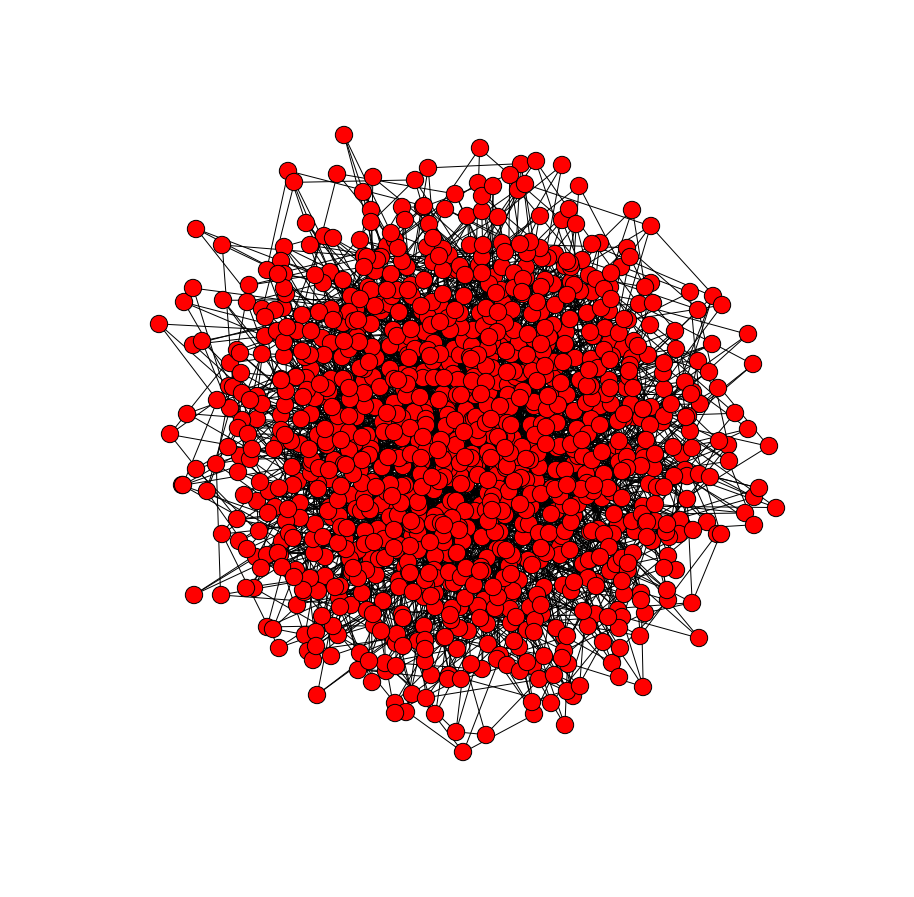

In [69]:
GA, averPathLenA, averClusterA, averNodeDegA = addUniformly(1100, 3)
plt.figure(figsize=(12,12)) 
nx.draw(GA)
kGA = list(GA.degree().values())

#### Model B

In [70]:
def addPrefAt(n, m):
    G = nx.Graph()
    averPathLen = np.zeros(n)
    averCluster = np.zeros(n)
    averNodeDeg = np.zeros(n)
   
    for i in range(1, m + 2):
        G.add_node(i)
        G.add_edges_from([(x, i) for x in np.arange(1,i)])
        if i > 1:
            averPathLen[i - 1] = nx.average_shortest_path_length(G)
            averCluster[i - 1] = nx.average_clustering(G)
            averNodeDeg[i - 1] = np.mean(list(G.degree().values()))
        print(str(i) + '/' + str(n), end = '\r')
    
    for i in range(m + 2, n + 1):
        G.add_node(i)
        candidates = np.arange(1,i)
        
        # calculating distribution of connecting new node
        # to existing ones
        sum = np.sum([G.degree(x) for x in candidates])
        p = [G.degree(x) / sum for x in candidates]
        
        chosen = np.random.choice(range(1, i), p = p, size = m)
        G.add_edges_from([(x, i) for x in chosen])
        
        averPathLen[i - 1] = nx.average_shortest_path_length(G)
        averCluster[i - 1] = nx.average_clustering(G)
        averNodeDeg[i - 1] = np.mean(list(G.degree().values()))
        print(str(i) + '/' + str(n), end = '\r')
        
    return G, averPathLen, averCluster, averNodeDeg

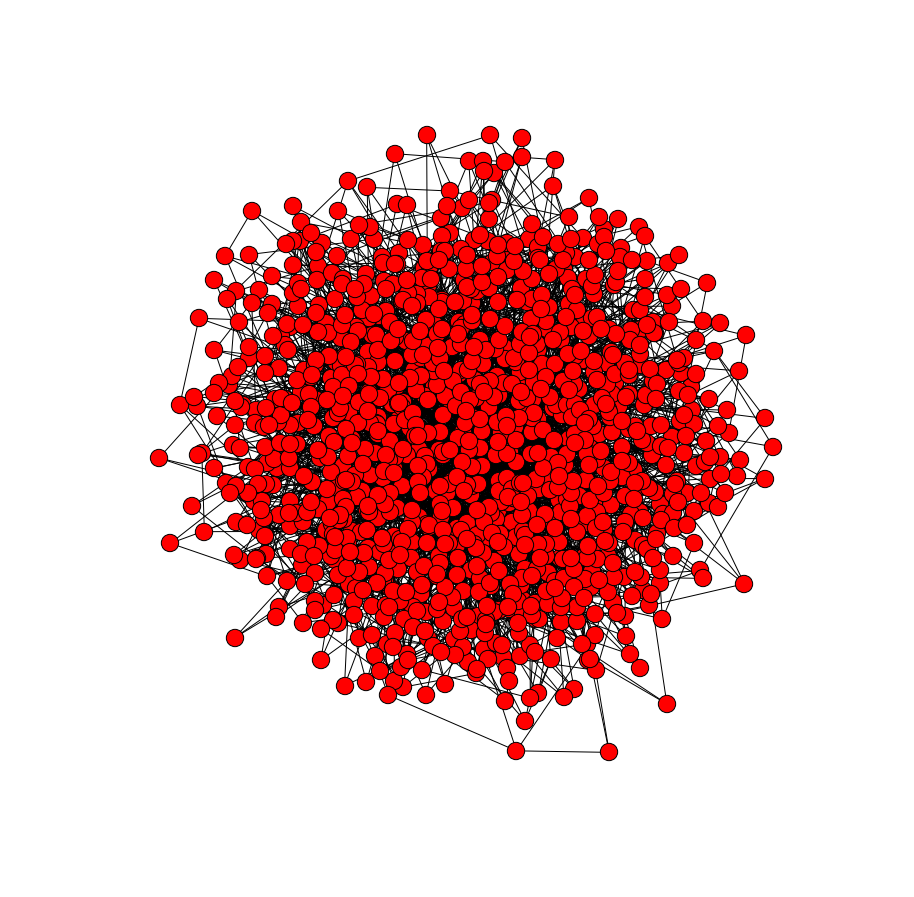

In [10]:
GB, averPathLenB, averClusterB, averNodeDegB = addPrefAt(1100, 3)
plt.figure(figsize=(12,12)) 
nx.draw(GB)
kGB = list(GB.degree().values())

### 2. Computing CDF/PDF, describing the distribution and computing\describing its properties.

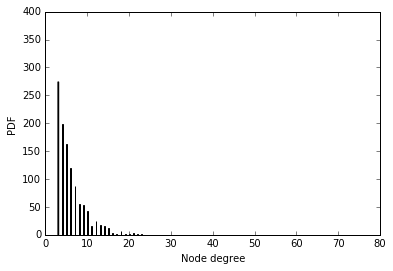

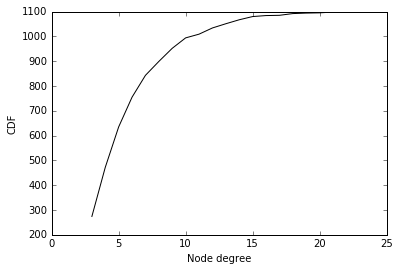

MODEL A DISTRIBUTION PARAMETERS
Mean =  5.98909090909
Variance =  11.227153719
Skewness =  1.7009930572884417
Kurtosis =  3.3056343895906677


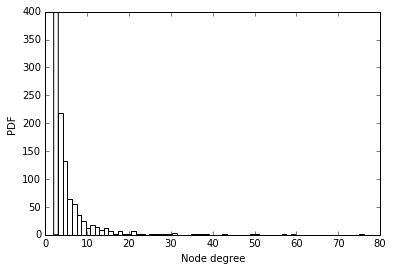

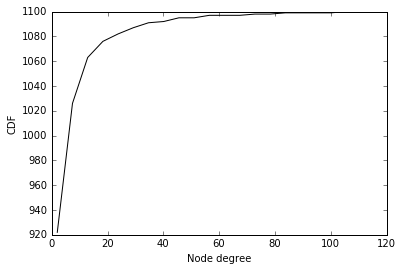

MODEL B DISTRIBUTION PARAMETERS
Mean =  5.93272727273
Variance =  52.3282016529
Skewness =  7.130910443316902
Kurtosis =  72.40934394861571


In [5]:
#plt.rc('font', **{'size'   : 12})
size = len(kGA)
x = scipy.arange(size)
plt.hist(kGA, bins=100, color='w')
plt.xlim(0,80)
plt.ylim(0,400)
plt.xlabel('Node degree')
plt.ylabel('PDF')
plt.show()

values, base = np.histogram(kGA, bins=20)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='k')
plt.xlabel('Node degree')
plt.ylabel('CDF')
plt.show()

print('MODEL A DISTRIBUTION PARAMETERS')
print('Mean = ', np.mean(kGA))
print('Variance = ', np.var(kGA))
print('Skewness = ', scipy.stats.skew(kGA))
print('Kurtosis = ', scipy.stats.kurtosis(kGA))

size = len(kGB)
x = scipy.arange(size)
plt.hist(kGB, bins=100, color='w')
plt.xlim(0,80)
plt.ylim(0,400)
plt.xlabel('Node degree')
plt.ylabel('PDF')
plt.show()

values, base = np.histogram(kGB, bins=20)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='k')
plt.xlabel('Node degree')
plt.ylabel('CDF')
plt.show()

print('MODEL B DISTRIBUTION PARAMETERS')
print('Mean = ', np.mean(kGB))
print('Variance = ', np.var(kGB))
print('Skewness = ', scipy.stats.skew(kGB))
print('Kurtosis = ', scipy.stats.kurtosis(kGB))

**Mean** of **model A** and **model B** is almost the same because of the same part of algorithms. Each step we increase a node degree of m nodes by 1 and make added node degree equals m. So difference is what node to connect. In the **model A** we have not so big difference in node degrees, but in **model B** we have some nodes with big node degree and another ones have very low node degree.

Because of this difference in node degrees in **model B** we have so bigger **variance** than **model A** and **skewness** with **kurtosis** so bigger for **model B**

### a. b. Illustating the average path length to the number of nodes

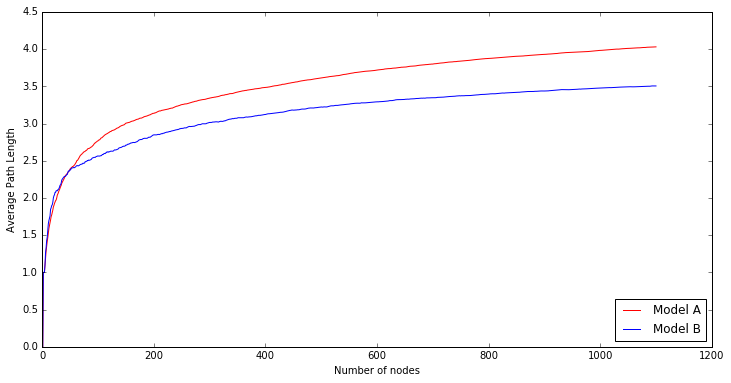

In [9]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(averPathLenA) + 1), averPathLenA, color='r', label=u'Model A')
plt.plot(np.arange(1, len(averPathLenB) + 1), averPathLenB, color='b', label=u'Model B')
plt.ylabel('Average Path Length')
plt.xlabel('Number of nodes')
plt.legend(numpoints = 3, loc = 4)
plt.show()

### 3. b. Illustating the average clustering coefficient to the number of nodes

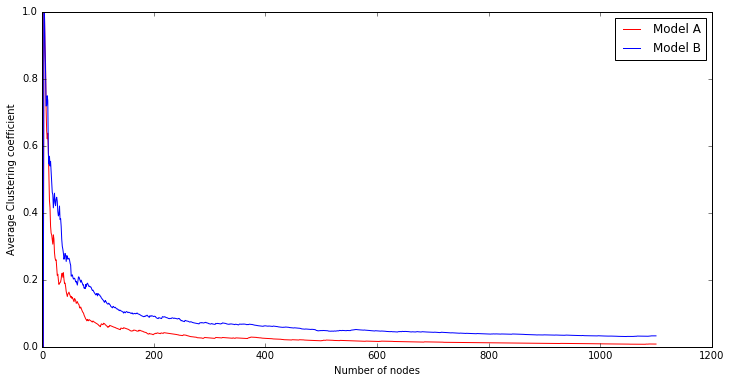

In [12]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(averClusterA) + 1), averClusterA, color='r', label=u'Model A')
plt.plot(np.arange(1, len(averClusterB) + 1), averClusterB, color='b', label=u'Model B')
plt.ylabel('Average Clustering coefficient')
plt.xlabel('Number of nodes')
plt.legend(numpoints = 3, loc = 1)
plt.show()

### 3. a. Illustating the average node degee to the nodes "age"

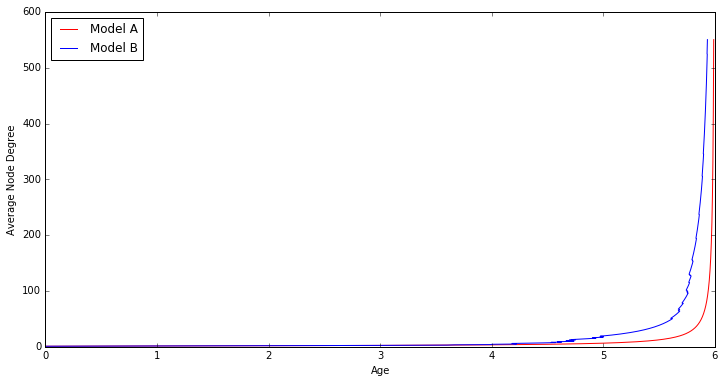

In [14]:
age = np.zeros(len(averNodeDegA))

for i in range(len(averNodeDegA)):
    age[i] = np.mean([j for j in range(1, i + 2)])

plt.figure(figsize=(12,6))
plt.plot(averNodeDegA, age, color='r', label=u'Model A')
plt.plot(averNodeDegB, age, color='b', label=u'Model B')
plt.ylabel('Average Node Degree')
plt.xlabel('Age')
plt.legend(numpoints = 3, loc = 2)
plt.show()

### 4. Is scale-free property conserved in these models?

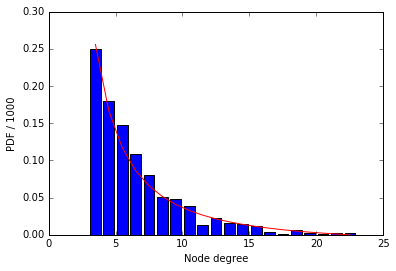

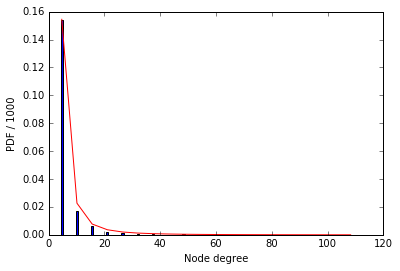

In [43]:
def powerLaw(x, a, b):
    return a * x ** b

a1 = 2.
b1 = -1.6

histA, binsA = np.histogram(kGA, bins = 20, density = True)
centerA = (binsA[:-1] + binsA[1:]) / 2
minimumA = np.min(powerLaw(centerA, a1, b1))

plt.bar(centerA, histA, align='center', color = 'b')
plt.plot(centerA, powerLaw(centerA, a1, b1) - minimumA, color = 'r')
plt.ylabel('PDF / 1000')
plt.xlabel('Node degree')
plt.show()

a2 = 7.5
b2 = -2.5

histB, binsB = np.histogram(kGB, bins = 20, density = True)
centerB = (binsB[:-1] + binsB[1:]) / 2
minimumB = np.min(powerLaw(centerB, a2, b2))

plt.bar(centerB, histB, align='center', color = 'b')
plt.plot(centerB, powerLaw(centerB, a2, b2) - minimumB, color = 'r')
plt.ylabel('PDF / 1000')
plt.xlabel('Node degree')
plt.show()

So we choosed parameters of power law such way that we fit our pdfs and it means scale-free property conserved in these models.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

### 1. Generating graphs based on the model (N = 2000 > 1000 nodes)

In [71]:
def vertexCopyingModel(G, n, q, type, averPathLenIn, averClusterIn, averNodeDegIn):
    assert n > len(G.nodes())
    
    averPathLen = np.zeros(n)
    averCluster = np.zeros(n)
    averNodeDeg = np.zeros(n)
    
    if type == 'directed':
        for i in range(len(G.nodes())):
            averPathLen[i] = averPathLenIn[i]
            averNodeDeg[i] = averNodeDegIn[i]
            
        for i in range(len(G.nodes()) + 1, n + 1):
            copiedVer = np.random.choice(range(1, i))
            G.add_node(i)
            
            successors = G.successors(copiedVer)
            rand       = np.random.uniform(size=len(successors))
            chosen     = np.argwhere(rand < q)
            if len(chosen) > 0:
                G.add_edges_from([(i, successors[int(x)]) for x in chosen])
                
            predecessors = G.predecessors(copiedVer)
            rand         = np.random.uniform(size=len(predecessors))
            chosen       = np.argwhere(rand < q)
            if len(chosen) > 0:
                G.add_edges_from([(predecessors[int(x)], i) for x in chosen])
            
            notsuccessors = [n for n in range(1, i) if n not in successors]
            rand          = np.random.uniform(size=len(notsuccessors))
            chosen        = np.argwhere(rand < 1 - q)
            if len(chosen) > 0:
                G.add_edges_from([(i, notsuccessors[int(x)]) for x in chosen])
                
            notpredecessors = [n for n in range(1, i) if n not in predecessors]
            rand            = np.random.uniform(size=len(notpredecessors))
            chosen          = np.argwhere(rand < 1 - q)
            if len(chosen) > 0:
                G.add_edges_from([(notpredecessors[int(x)], i) for x in chosen])
                
            averPathLen[i - 1] = nx.average_shortest_path_length(G)
            averNodeDeg[i - 1] = np.mean(list(G.degree().values()))
            print(str(i) + '/' + str(n), end = '\r')
                
        return G, averPathLen, averNodeDeg
    
    elif type == 'undirected':
        for i in range(len(G.nodes())):
            averPathLen[i] = averPathLenIn[i]
            averCluster[i] = averClusterIn[i]
            averNodeDeg[i] = averNodeDegIn[i]
            
        for i in range(len(G.nodes()) + 1, n + 1):
            copiedVer = np.random.choice(range(1, i))
            G.add_node(i)
            
            neighbors = G.neighbors(copiedVer)
            rand      = np.random.uniform(size=len(neighbors))
            chosen    = np.argwhere(rand < q)
            if len(chosen) > 0:
                G.add_edges_from([(neighbors[int(x)], i) for x in chosen])
            
            notneighbors = [n for n in range(1, i) if n not in neighbors]
            rand         = np.random.uniform(size=len(notneighbors))
            chosen       = np.argwhere(rand < 1 - q)
            if len(chosen) > 0:
                G.add_edges_from([(notneighbors[int(x)], i) for x in chosen])
                
            averPathLen[i - 1] = nx.average_shortest_path_length(G)
            averCluster[i - 1] = nx.average_clustering(G)
            averNodeDeg[i - 1] = np.mean(list(G.degree().values()))
            print(str(i) + '/' + str(n), end = '\r')
            
        return G, averPathLen, averCluster, averNodeDeg
    else:
        print('ERROR')

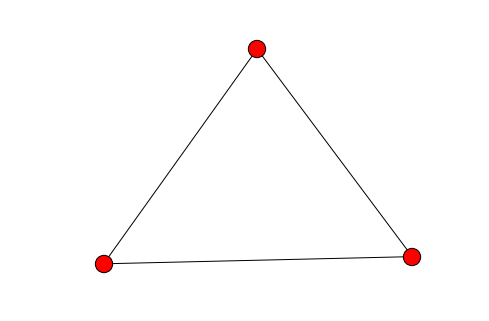

In [75]:
GVCu, averPathLenIn, averClusterIn, averNodeDegIn = addPrefAt(3, 2)
nx.draw(GVCu)

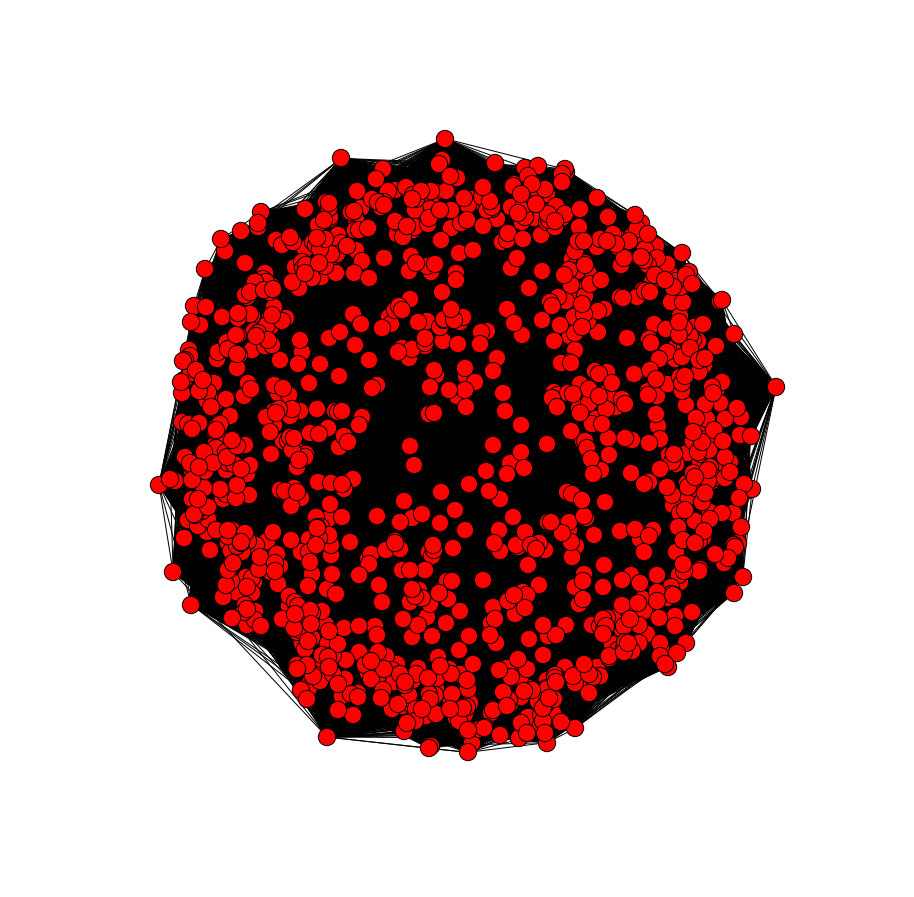

In [76]:
GVCu, averPathLenVCu, averClusterVCu, averNodeDegVCu = vertexCopyingModel(GVCu, 1100, 0.7, 'undirected', averPathLenIn, averClusterIn, averNodeDegIn)
plt.figure(figsize=(12,12))
nx.draw(GVCu)

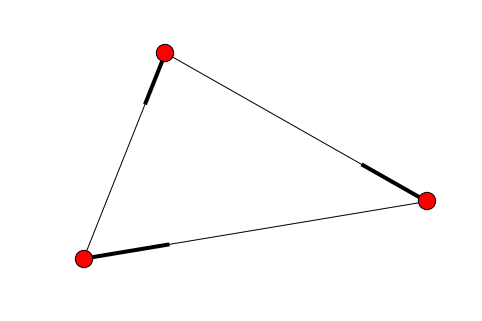

In [77]:
averPathLenIn = np.zeros(3)
averNodeDegIn = np.zeros(3)
GVCd = nx.DiGraph()
GVCd.add_nodes_from([1, 2, 3])
GVCd.add_edges_from([(1, 2), (2, 3)])
averPathLenIn[1] = nx.average_shortest_path_length(GVCd)
averNodeDegIn[1] = np.mean(list(GVCd.degree().values()))
GVCd.add_edges_from([(3, 1)])
averPathLenIn[2] = nx.average_shortest_path_length(GVCd)
averNodeDegIn[2] = np.mean(list(GVCd.degree().values()))
nx.draw(GVCd)

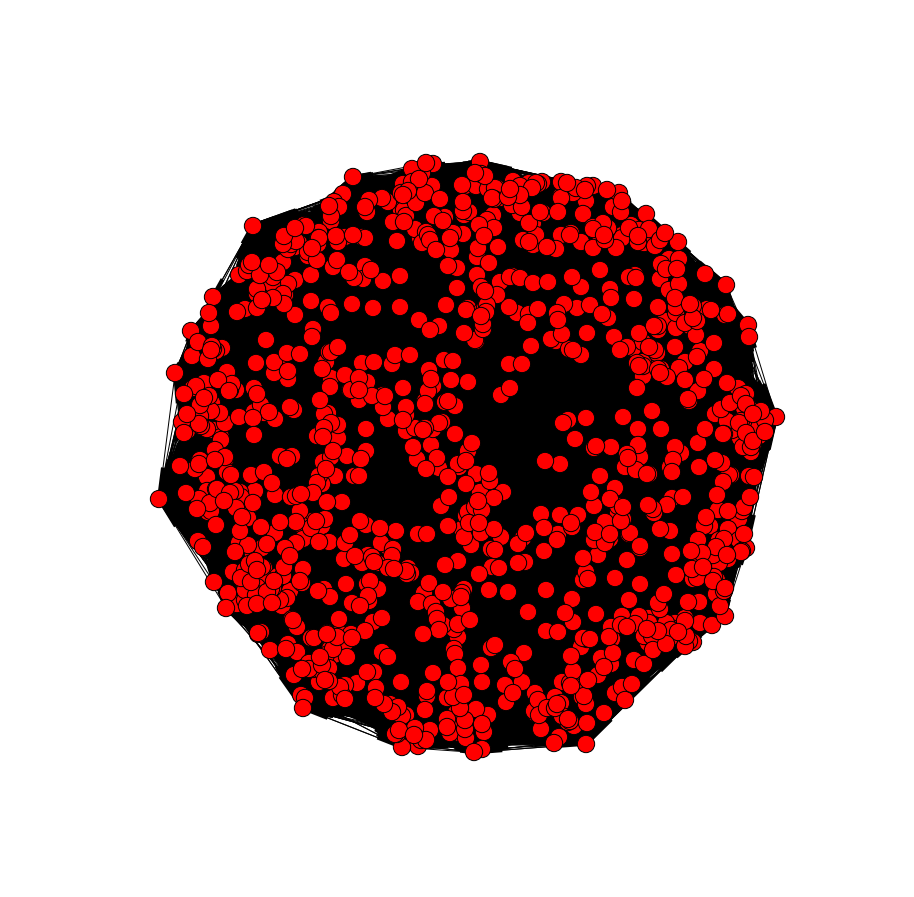

In [78]:
GVCd, averPathLenVCd, averNodeDegVCd = vertexCopyingModel(GVCd, 1100, 0.7, 'directed', averPathLenIn, range(len(averPathLenIn)), averNodeDegIn)
plt.figure(figsize=(12,12))
nx.draw(GVCd)

### 2. Compute CDF/PDF, describe the distribution and compute\describe its properties.

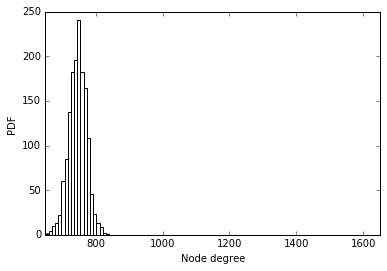

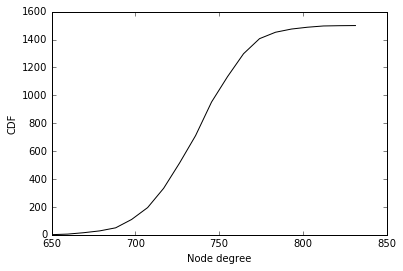

UNDIRECTED GRAPH DISTRIBUTION PARAMETERS
Mean =  746.098666667
Variance =  696.322264889
Skewness =  -0.11083502607553333
Kurtosis =  0.19370676339072723


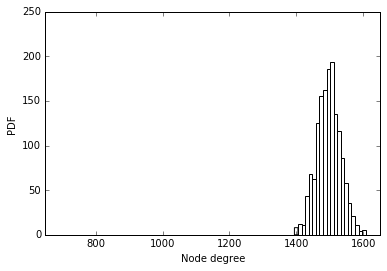

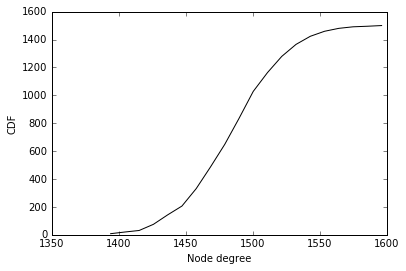

DIRECTED GRAPH B DISTRIBUTION PARAMETERS
Mean =  1495.41733333
Variance =  1247.56316622
Skewness =  0.027642152441603916
Kurtosis =  -0.025586366351877388


In [803]:
kGVCu = list(GVCu.degree().values())
kGVCd = list(GVCd.degree().values())

size = len(kGVCu)
x = scipy.arange(size)
plt.hist(kGVCu, bins=20, color='w')
plt.xlim(650, 1650)
plt.ylim(0, 250)
plt.xlabel('Node degree')
plt.ylabel('PDF')
plt.show()

values, base = np.histogram(kGVCu, bins=20)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='k')
plt.xlabel('Node degree')
plt.ylabel('CDF')
plt.show()

print('UNDIRECTED GRAPH DISTRIBUTION PARAMETERS')
print('Mean = ', np.mean(kGVCu))
print('Variance = ', np.var(kGVCu))
print('Skewness = ', scipy.stats.skew(kGVCu))
print('Kurtosis = ', scipy.stats.kurtosis(kGVCu))

size = len(kGVCd)
x = scipy.arange(size)
plt.hist(kGVCd, bins=20, color='w')
plt.xlim(650, 1650)
plt.ylim(0, 250)
plt.xlabel('Node degree')
plt.ylabel('PDF')
plt.show()

values, base = np.histogram(kGVCd, bins=20)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='k')
plt.xlabel('Node degree')
plt.ylabel('CDF')
plt.show()

print('DIRECTED GRAPH B DISTRIBUTION PARAMETERS')
print('Mean = ', np.mean(kGVCd))
print('Variance = ', np.var(kGVCd))
print('Skewness = ', scipy.stats.skew(kGVCd))
print('Kurtosis = ', scipy.stats.kurtosis(kGVCd))

**Mean** and **variance** in **directed case** is two times bigger because of two kind of directions for edges. The reason of **like normal look** of distribution is copying on each step of existing node with its edges (in our case the probability of connecting this node to not neighboors (successors and predecessors) is very little). So because of it **skewness** and **kurtosis** are almost zeros. 

### 3. Illustating the average path length to the number of nodes

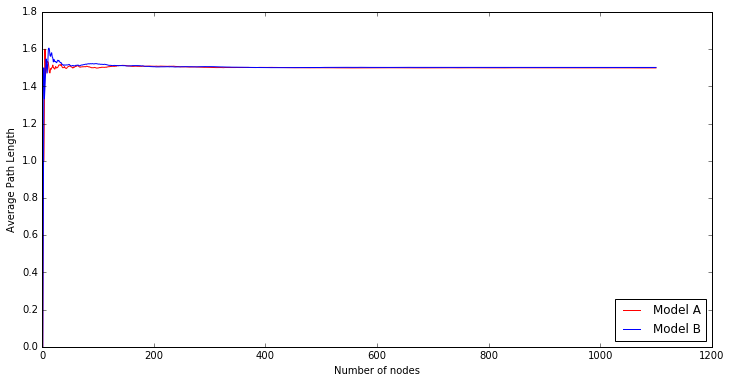

In [82]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(averPathLenVCu) + 1), averPathLenVCu, color='r', label=u'Model A')
plt.plot(np.arange(1, len(averPathLenVCd) + 1), averPathLenVCd, color='b', label=u'Model B')
plt.ylabel('Average Path Length')
plt.xlabel('Number of nodes')
plt.legend(numpoints = 3, loc = 4)
plt.show()

### 3. Illustating the average clustering coefficient to the number of nodes

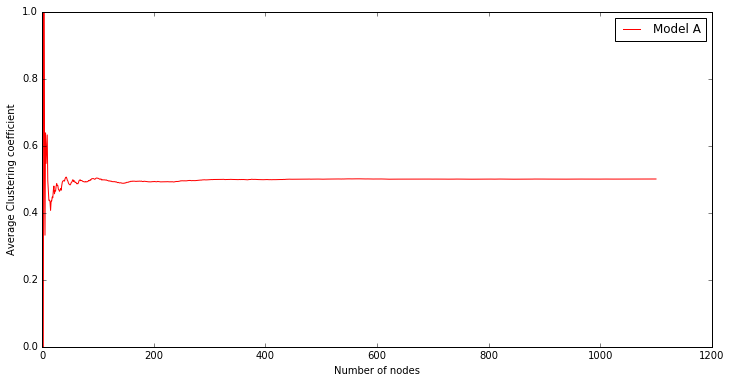

In [83]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(averClusterVCu) + 1), averClusterVCu, color='r', label=u'Model A')
plt.ylabel('Average Clustering coefficient')
plt.xlabel('Number of nodes')
plt.legend(numpoints = 3, loc = 1)
plt.show()

### 3. Illustating the average node degee to the nodes "age"

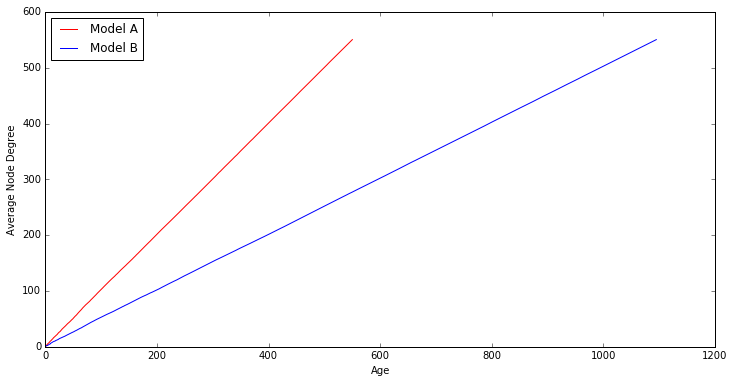

In [84]:
age = np.zeros(len(averNodeDegA))

for i in range(len(averNodeDegA)):
    age[i] = np.mean([j for j in range(1, i + 2)])

plt.figure(figsize=(12,6))
plt.plot(averNodeDegVCu, age, color='r', label=u'Model A')
plt.plot(averNodeDegVCd, age, color='b', label=u'Model B')
plt.ylabel('Average Node Degree')
plt.xlabel('Age')
plt.legend(numpoints = 3, loc = 2)
plt.show()

### Analyse results with respect to various parameter settings

So let's firstly analyse results we have upper. Average path length almost not changes. It influence two facts. From one side we always will get bigger network so it influence average length path to grow, but second fact that adding one more node with some connections will influence average length path to fall because of we add new short paths.

There is almost the same situation with clustering coefficient, because of copying of nodes with it connections we don't change the structure of the network.

The average node degree almost constantly grows because of the method of generating graph (described upper). And there is the same situation with age. And finally we get linear relation.

If we change the probability from never changes because generally things described before will applyied for any probability. This is shown for probability 0.3 lawer (before we had 0.7).

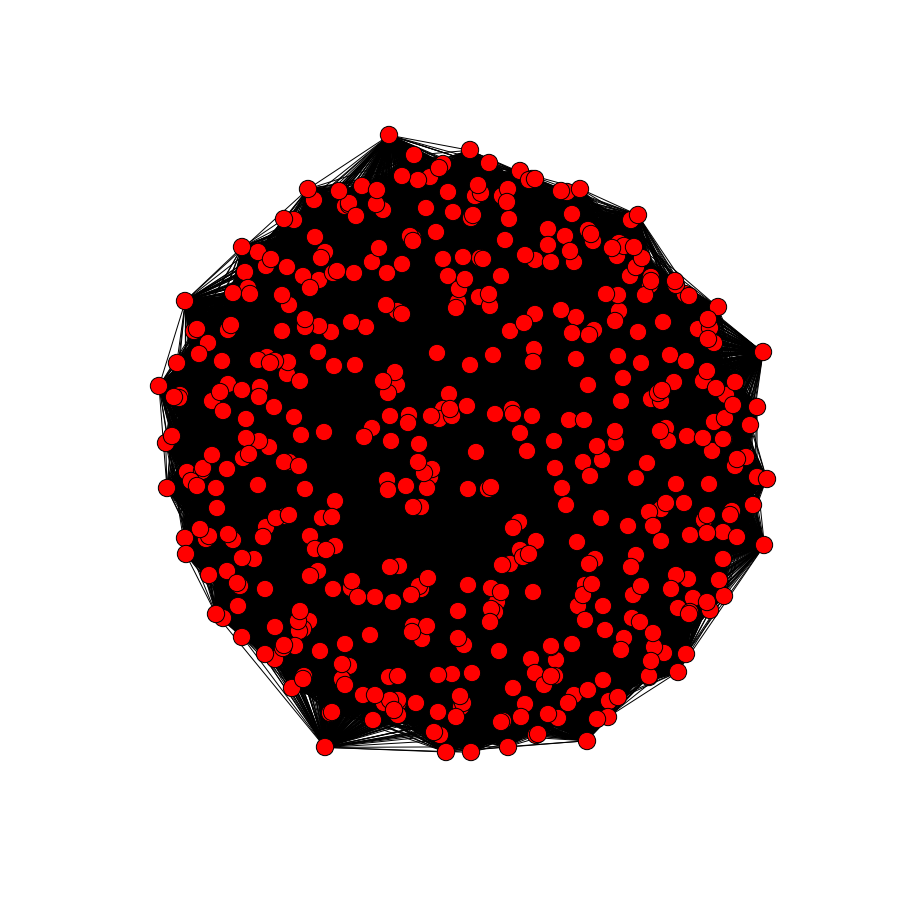

In [98]:
GVCu1, averPathLenIn, averClusterIn, averNodeDegIn = addPrefAt(3, 2)
GVCu1, averPathLenVCu1, averClusterVCu1, averNodeDegVCu1 = vertexCopyingModel(GVCu1, 500, 0.3, 'undirected', averPathLenIn, averClusterIn, averNodeDegIn)
plt.figure(figsize=(12,12))
nx.draw(GVCu1)

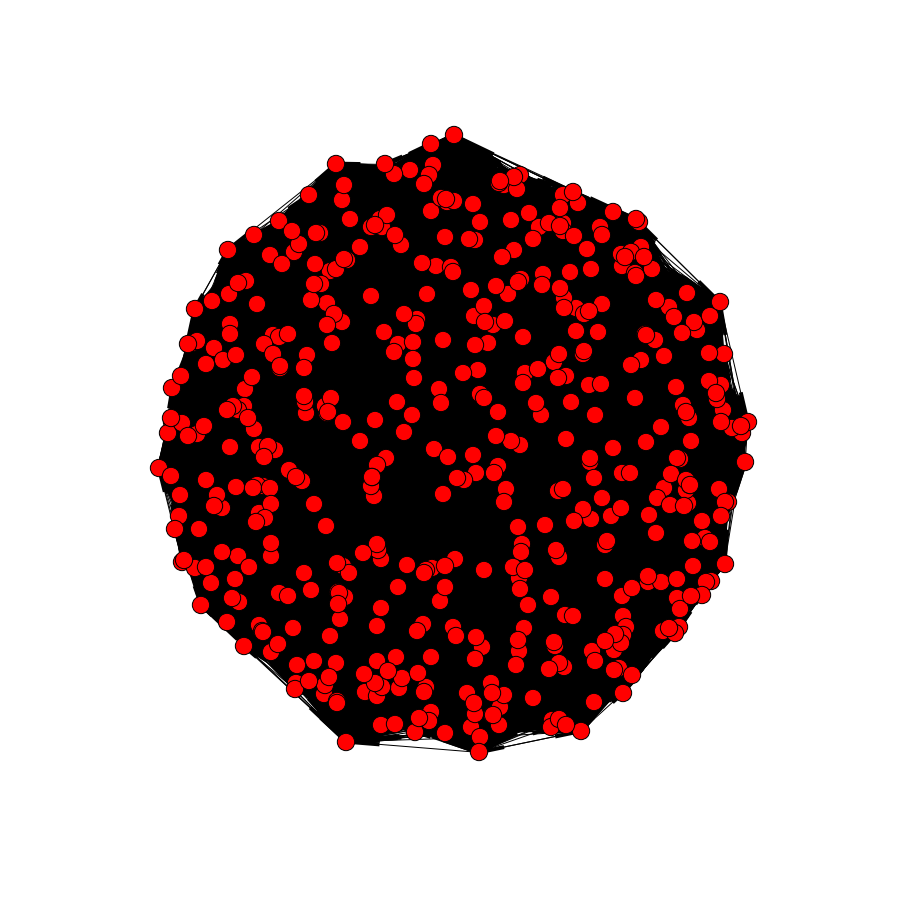

In [99]:
averPathLenIn = np.zeros(3)
averNodeDegIn = np.zeros(3)
GVCd1 = nx.DiGraph()
GVCd1.add_nodes_from([1, 2, 3])
GVCd1.add_edges_from([(1, 2), (2, 3)])
averPathLenIn[1] = nx.average_shortest_path_length(GVCd1)
averNodeDegIn[1] = np.mean(list(GVCd1.degree().values()))
GVCd1.add_edges_from([(3, 1)])
averPathLenIn[2] = nx.average_shortest_path_length(GVCd1)
averNodeDegIn[2] = np.mean(list(GVCd1.degree().values()))

GVCd1, averPathLenVCd1, averNodeDegVCd1 = vertexCopyingModel(GVCd1, 500, 0.3, 'directed', averPathLenIn, range(len(averPathLenIn)), averNodeDegIn)
plt.figure(figsize=(12,12))
nx.draw(GVCd1)

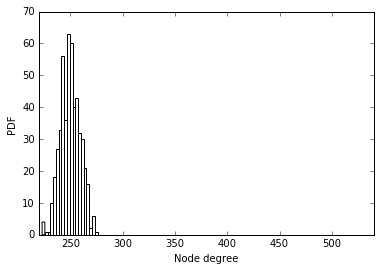

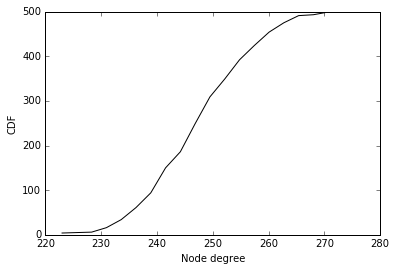

UNDIRECTED GRAPH DISTRIBUTION PARAMETERS
Mean =  249.792
Variance =  86.004736
Skewness =  0.053014179335932526
Kurtosis =  -0.2804632840913941


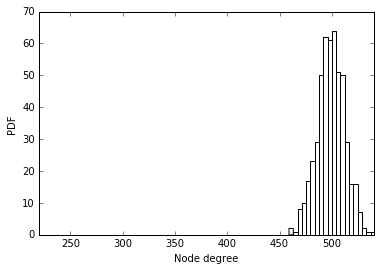

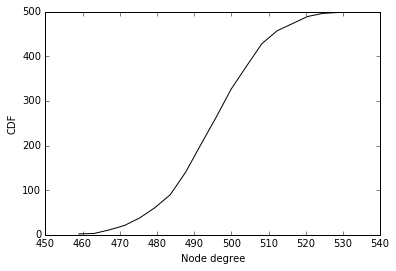

DIRECTED GRAPH B DISTRIBUTION PARAMETERS
Mean =  498.852
Variance =  171.314096
Skewness =  -0.03601393930683427
Kurtosis =  -0.09647422531525995


In [101]:
kGVCu1 = list(GVCu1.degree().values())
kGVCd1 = list(GVCd1.degree().values())

size = len(kGVCu1)
x = scipy.arange(size)
plt.hist(kGVCu1, bins=20, color='w')
plt.xlim(220, 540)
plt.ylim(0, 70)
plt.xlabel('Node degree')
plt.ylabel('PDF')
plt.show()

values, base = np.histogram(kGVCu1, bins=20)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='k')
plt.xlabel('Node degree')
plt.ylabel('CDF')
plt.show()

print('UNDIRECTED GRAPH DISTRIBUTION PARAMETERS')
print('Mean = ', np.mean(kGVCu1))
print('Variance = ', np.var(kGVCu1))
print('Skewness = ', scipy.stats.skew(kGVCu1))
print('Kurtosis = ', scipy.stats.kurtosis(kGVCu1))

size = len(kGVCd1)
x = scipy.arange(size)
plt.hist(kGVCd1, bins=20, color='w')
plt.xlim(220, 540)
plt.ylim(0, 70)
plt.xlabel('Node degree')
plt.ylabel('PDF')
plt.show()

values, base = np.histogram(kGVCd1, bins=20)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='k')
plt.xlabel('Node degree')
plt.ylabel('CDF')
plt.show()

print('DIRECTED GRAPH B DISTRIBUTION PARAMETERS')
print('Mean = ', np.mean(kGVCd1))
print('Variance = ', np.var(kGVCd1))
print('Skewness = ', scipy.stats.skew(kGVCd1))
print('Kurtosis = ', scipy.stats.kurtosis(kGVCd1))

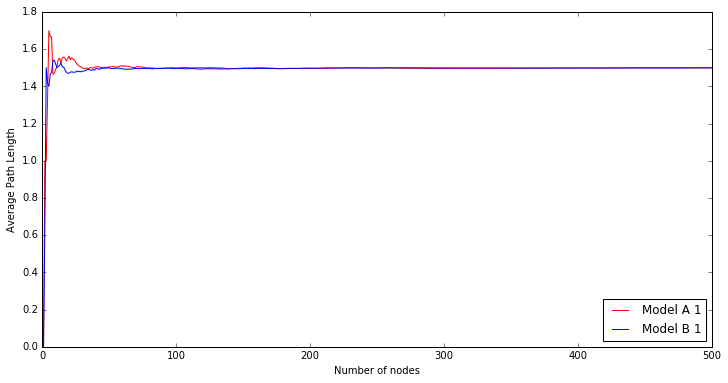

In [102]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(averPathLenVCu1) + 1), averPathLenVCu1, color='r', label=u'Model A 1')
plt.plot(np.arange(1, len(averPathLenVCd1) + 1), averPathLenVCd1, color='b', label=u'Model B 1')
plt.ylabel('Average Path Length')
plt.xlabel('Number of nodes')
plt.legend(numpoints = 3, loc = 4)
plt.show()

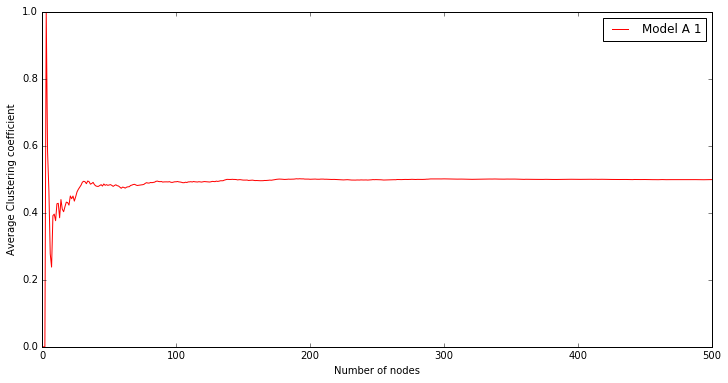

In [103]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(averClusterVCu1) + 1), averClusterVCu1, color='r', label=u'Model A 1')
plt.ylabel('Average Clustering coefficient')
plt.xlabel('Number of nodes')
plt.legend(numpoints = 3, loc = 1)
plt.show()

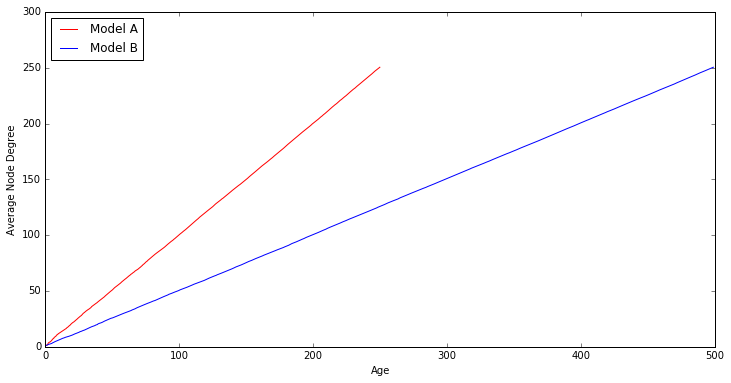

In [108]:
age = np.zeros(len(averNodeDegVCu1))

for i in range(len(averNodeDegVCd1)):
    age[i] = np.mean([j for j in range(1, i + 2)])


plt.figure(figsize=(12,6))
plt.plot(averNodeDegVCu1, age, color='r', label=u'Model A')
plt.plot(averNodeDegVCd1, age, color='b', label=u'Model B')
plt.ylabel('Average Node Degree')
plt.xlabel('Age')
plt.legend(numpoints = 3, loc = 2)
plt.show()